# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [61]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv('kc_house_data_train.csv')
df

Unnamed: 0          id             date      price  bedrooms  \
0               0  2591820310  20141006T000000   365000.0         4   
1               1  7974200820  20140821T000000   865000.0         5   
2               2  7701450110  20140815T000000  1038000.0         4   
3               3  9522300010  20150331T000000  1490000.0         3   
4               4  9510861140  20140714T000000   711000.0         3   
...           ...         ...              ...        ...       ...   
17285       17285   627300195  20150303T000000   750000.0         5   
17286       17286  8819900270  20140520T000000   440000.0         2   
17287       17287  3816300095  20140514T000000   310000.0         3   
17288       17288   122069107  20141204T000000   427500.0         3   
17289       17289  6703100135  20150116T000000   348000.0         3   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
0           2.25         2070      8893     2.0           0     0          4   
1           3.00         2900      6730     1.0           0     0          5   
2           2.50         3770     10893     2.0           0     2          3   
3           3.50         4560     14608     2.0           0     2          3   
4           2.50         2550      5376     2.0           0     0          3   
...          ...          ...       ...     ...         ...   ...        ...   
17285       2.50         3240      9960     1.0           0     1          3   
17286       1.75         1300      4000     2.0           0     0          3   
17287       1.00         1050      9876     1.0           0     0          3   
17288       1.50         1900     43186     1.5           0     0          4   
17289       1.50         1330      6768     1.0           0     0          4   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0          8        2070              0      1986             0    98058   
1          8        1830           1070      1977             0    98115   
2         11        3770              0      1997             0    98006   
3         12        4560              0      1990             0    98034   
4          9        2550              0      2004             0    98052   
...      ...         ...            ...       ...           ...      ...   
17285      8        2020           1220      1958             0    98008   
17286      7        1300              0      1948             0    98105   
17287      7        1050              0      1953             0    98028   
17288      7        1300            600      1971             0    98038   
17289      7        1330              0      1952             0    98155   

           lat     long  sqft_living15  sqft_lot15  
0      47.4388 -122.162           2390        7700  
1      47.6784 -122.285           2370        6283  
2      47.5646 -122.129           3710        9685  
3      47.6995 -122.228           4050       14226  
4      47.6647 -122.083           2250        4050  
...        ...      ...            ...         ...  
17285  47.5858 -122.112           2730       10400  
17286  47.6687 -122.288           1350        4013  
17287  47.7635 -122.262           1760        9403  
17288  47.4199 -121.990           2080      108028  
17289  47.7366 -122.319           1320        6910  

[17290 rows x 22 columns]

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [63]:
#I want to look at my data set and determine which features have extreme values.
#bedrooms had a large range from 0 to 33
#bathrooms range from 0 to 8
#sqft_lot15 range 

df.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  17290.000000  1.729000e+04  1.729000e+04  17290.000000  17290.000000   
mean    8644.500000  4.565502e+09  5.407395e+05      3.372470      2.111943   
std     4991.337413  2.874656e+09  3.733190e+05      0.939346      0.770476   
min        0.000000  1.000102e+06  7.500000e+04      0.000000      0.000000   
25%     4322.250000  2.114701e+09  3.210000e+05      3.000000      1.500000   
50%     8644.500000  3.903650e+09  4.500000e+05      3.000000      2.250000   
75%    12966.750000  7.301150e+09  6.450000e+05      4.000000      2.500000   
max    17289.000000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean    2081.464604  1.524340e+04      1.490312      0.007981      0.238519   
std      920.018539  4.230462e+04      0.538909      0.088985      0.775229   
min      290.000000  5.720000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.081250e+03      1.000000      0.000000      0.000000   
50%     1920.000000  7.642000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.072575e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000   
mean       3.408502      7.654425   1789.306015     292.158589   1970.792019   
std        0.651296      1.174718    829.265107     443.151874     29.343516   
min        1.000000      1.000000    290.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1200.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1560.000000       0.000000   1974.000000   
75%        4.000000      8.000000   2214.500000     560.000000   1996.000000   
max        5.000000     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   
mean      83.806304  98078.193175     47.560058   -122.214258    1987.986698   
std      400.329376     53.607949      0.138412      0.140857     684.802635   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471200   -122.329000    1490.000000   
50%        0.000000  98065.000000     47.571600   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.677900   -122.126000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   17290.000000  
mean    12873.475824  
std     27227.437583  
min       659.000000  
25%      5111.250000  
50%      7622.500000  
75%     10101.750000  
max    858132.000000

Text(0.5, 0, 'Bedrooms')

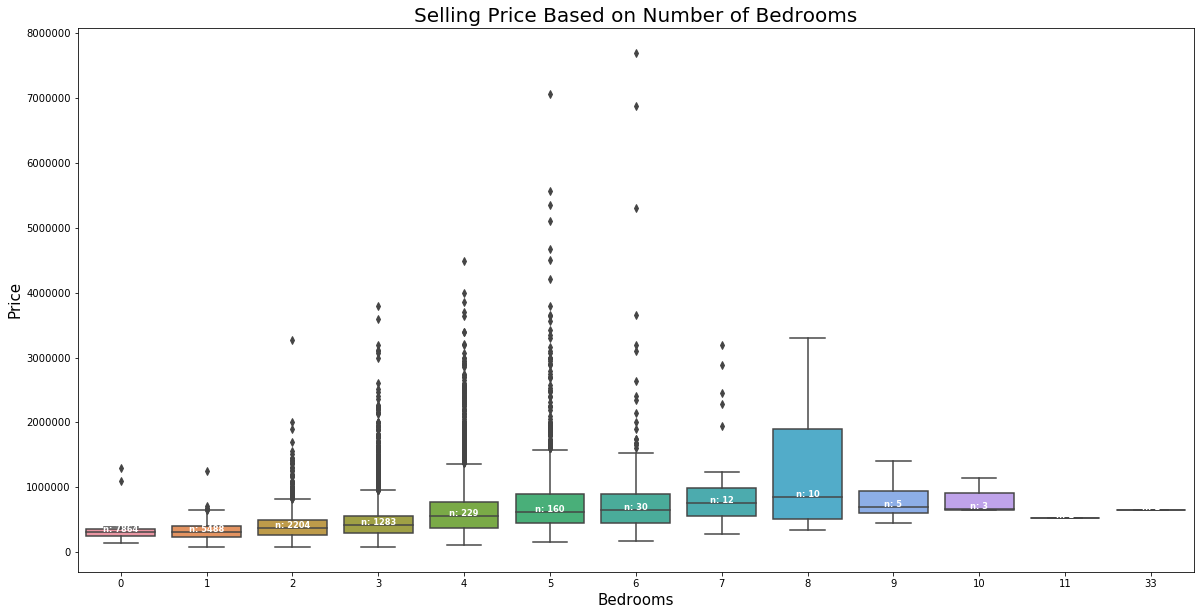

In [64]:
plt.figure(figsize=(20,10))
ax = sn.boxplot(x=df['bedrooms'], y=df['price'], data=df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['bedrooms'])['price'].median().values
nobs = df['bedrooms'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
horizontalalignment='center', size='small', color='w', weight='semibold')
plt.title('Selling Price Based on Number of Bedrooms', size=20)
plt.ylabel('Price', size=15)
plt.xlabel('Bedrooms', size=15)


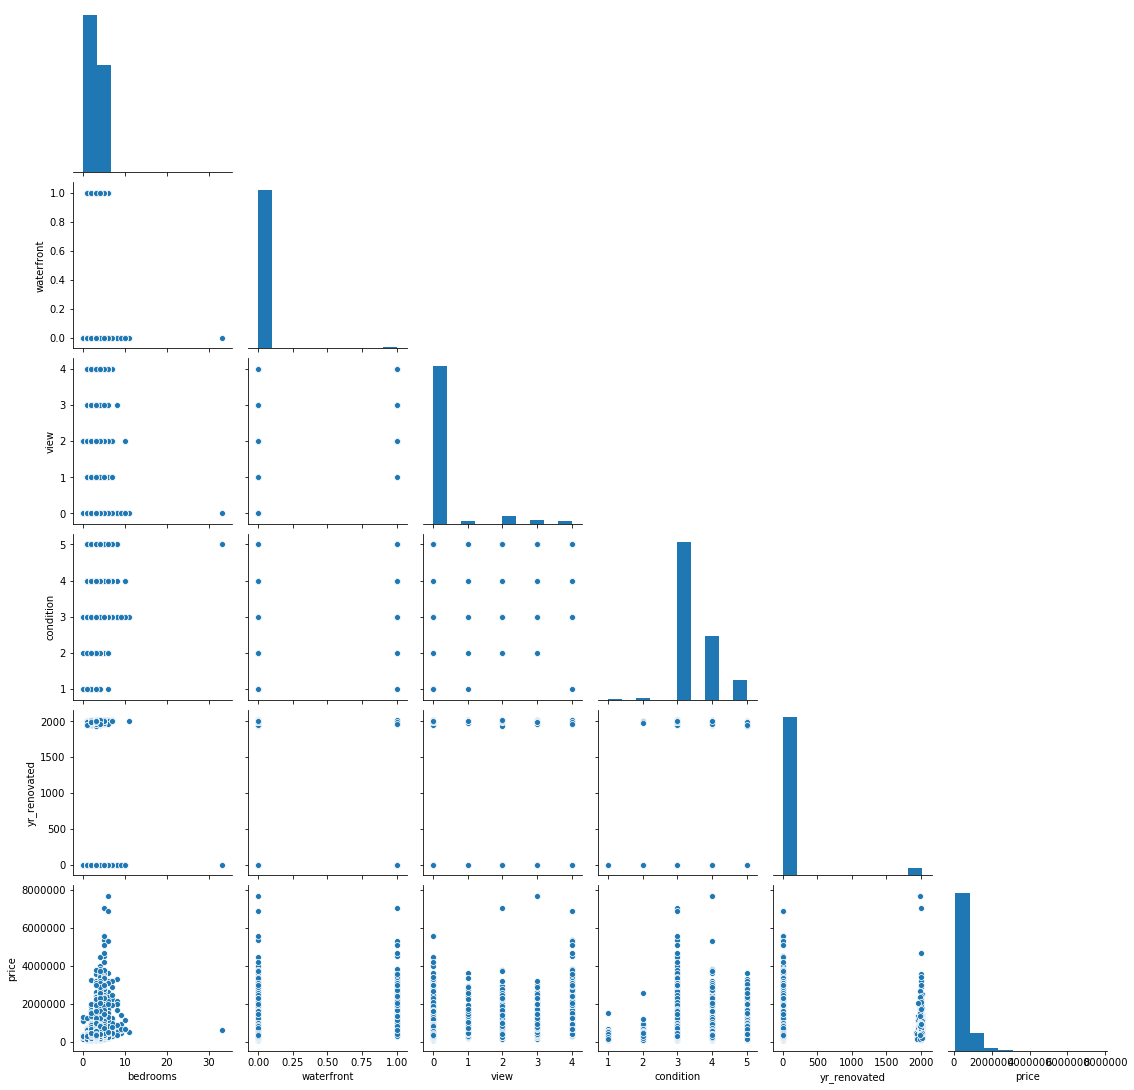

In [65]:
sn.pairplot(df[['bedrooms', 'waterfront', 'view', 'condition', 'yr_renovated', 'price']], corner=True)

(1920, 2018)

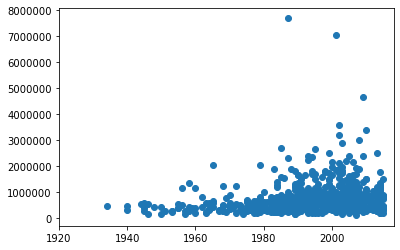

In [66]:
plt.scatter(df.yr_renovated, df.price)
plt.xlim(1920,2018)

In [67]:
df.loc[df.price > 5000000] 

Unnamed: 0          id             date      price  bedrooms  \
1979         1979  8907500070  20150413T000000  5350000.0         5   
2232         2232  2470100110  20140804T000000  5570000.0         5   
5039         5039  7558700030  20150413T000000  5300000.0         6   
6903         6903  9808700762  20140611T000000  7062500.0         5   
7519         7519  9208900037  20140919T000000  6885000.0         6   
10366       10366  6762700020  20141013T000000  7700000.0         6   
14668       14668  1247600105  20141020T000000  5110800.0         5   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
1979        5.00         8000     23985     2.0           0     4          3   
2232        5.75         9200     35069     2.0           0     0          3   
5039        6.00         7390     24829     2.0           1     4          4   
6903        4.50        10040     37325     2.0           1     2          3   
7519        7.75         9890     31374     2.0           0     4          3   
10366       8.00        12050     27600     2.5           0     3          4   
14668       5.25         8010     45517     2.0           1     4          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
1979      12        6720           1280      2009             0    98004   
2232      13        6200           3000      2001             0    98039   
5039      12        5000           2390      1991             0    98040   
6903      11        7680           2360      1940          2001    98004   
7519      13        8860           1030      2001             0    98039   
10366     13        8570           3480      1910          1987    98102   
14668     12        5990           2020      1999             0    98033   

           lat     long  sqft_living15  sqft_lot15  
1979   47.6232 -122.220           4600       21750  
2232   47.6289 -122.233           3560       24345  
5039   47.5631 -122.210           4320       24619  
6903   47.6500 -122.214           3930       25449  
7519   47.6305 -122.240           4540       42730  
10366  47.6298 -122.323           3940        8800  
14668  47.6767 -122.211           3430       26788

In [ ]:
#correlation 

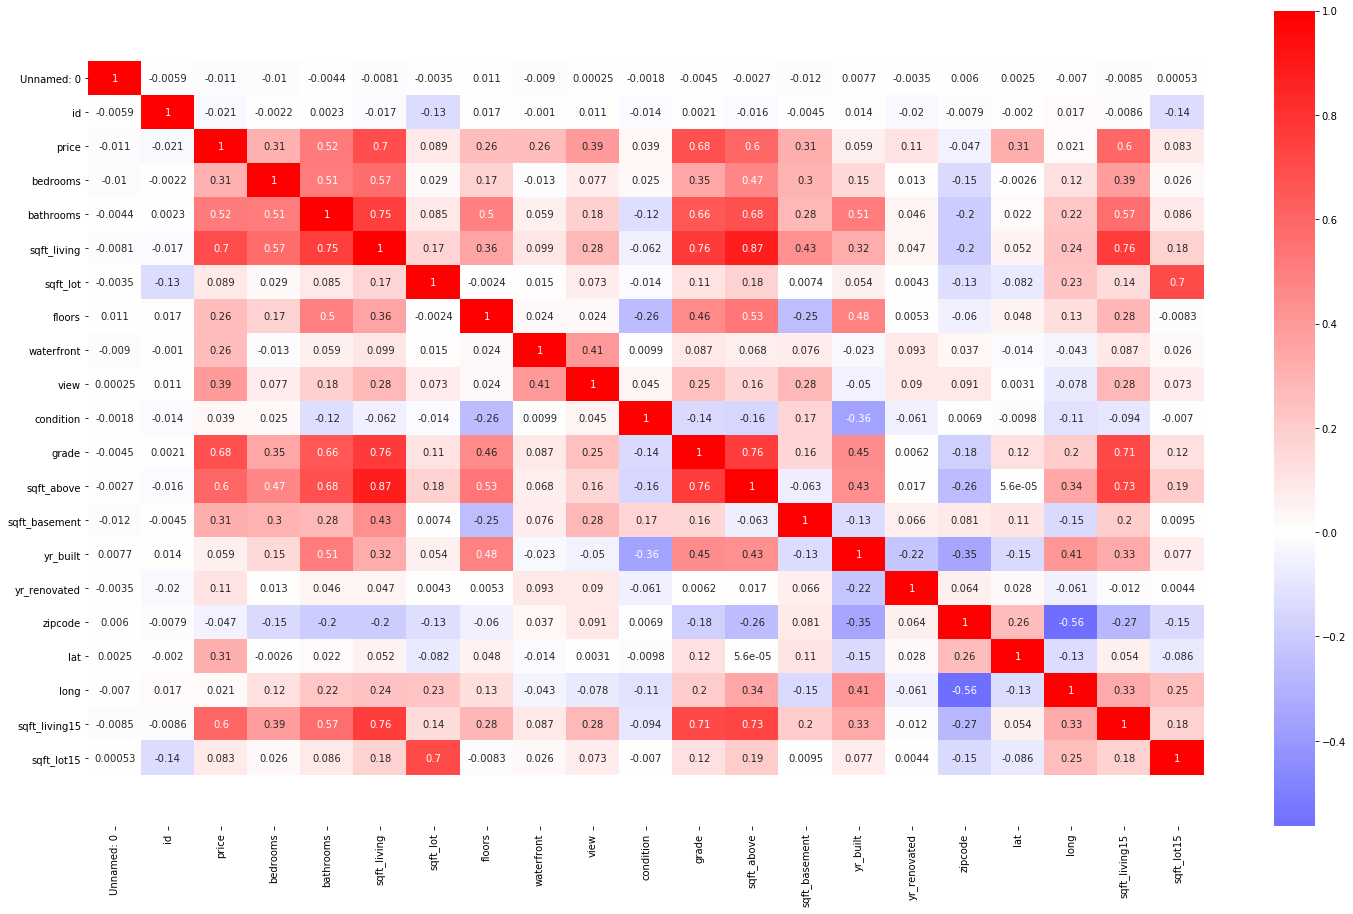

In [68]:
#create a heatmap to visualize the correlations
fig, ax = plt.subplots(figsize=(25,15)) # figsize to make larger
sn.heatmap(df.loc[df.price < 5000000].corr(), cmap='bwr', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 2 
t -= 2 
plt.ylim(b, t) 
plt.show()

In [69]:
df.loc[df.bedrooms > 8]

Unnamed: 0          id             date      price  bedrooms  \
2356         2356  1773100755  20140821T000000   520000.0        11   
3425         3425   424049043  20140811T000000   450000.0         9   
3680         3680  8812401450  20141229T000000   660000.0        10   
8207         8207  8823900290  20150317T000000  1400000.0         9   
8446         8446  8823901445  20150313T000000   934000.0         9   
8597         8597  2402100895  20140625T000000   640000.0        33   
8624         8624  1997200215  20140507T000000   599999.0         9   
11181       11181   627300145  20140814T000000  1148000.0        10   
14156       14156  2902200015  20150106T000000   700000.0         9   
17114       17114  5566100170  20141029T000000   650000.0        10   

       bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  \
2356        3.00         3000      4960     2.0           0     0          3   
3425        7.50         4050      6504     2.0           0     0          3   
3680        3.00         2920      3745     2.0           0     0          4   
8207        4.00         4620      5508     2.5           0     0          3   
8446        3.00         2820      4480     2.0           0     0          3   
8597        1.75         1620      6000     1.0           0     0          5   
8624        4.50         3830      6988     2.5           0     0          3   
11181       5.25         4590     10920     1.0           0     2          3   
14156       3.00         3680      4400     2.0           0     0          3   
17114       2.00         3610     11914     2.0           0     0          4   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
2356       7        2400            600      1918          1999    98106   
3425       7        4050              0      1996             0    98144   
3680       7        1860           1060      1913             0    98105   
8207      11        3870            750      1915             0    98105   
8446       7        1880            940      1918             0    98105   
8597       7        1040            580      1947             0    98103   
8624       7        2450           1380      1938             0    98103   
11181      9        2500           2090      2008             0    98004   
14156      7        2830            850      1908             0    98102   
17114      7        3010            600      1958             0    98006   

           lat     long  sqft_living15  sqft_lot15  
2356   47.5560 -122.363           1420        4960  
3425   47.5923 -122.301           1448        3866  
3680   47.6635 -122.320           1810        3745  
8207   47.6684 -122.309           2710        4320  
8446   47.6654 -122.307           2460        4400  
8597   47.6878 -122.331           1330        4700  
8624   47.6927 -122.338           1460        6291  
11181  47.5861 -122.113           2730       10400  
14156  47.6374 -122.324           1960        2450  
17114  47.5705 -122.175           2040       11914

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [72]:
df['bedrooms'] = df['bedrooms'].replace([33], 3)

In [73]:
df.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  17290.000000  1.729000e+04  1.729000e+04  17290.000000  17290.000000   
mean    8644.500000  4.565502e+09  5.407395e+05      3.370735      2.111943   
std     4991.337413  2.874656e+09  3.733190e+05      0.911923      0.770476   
min        0.000000  1.000102e+06  7.500000e+04      0.000000      0.000000   
25%     4322.250000  2.114701e+09  3.210000e+05      3.000000      1.500000   
50%     8644.500000  3.903650e+09  4.500000e+05      3.000000      2.250000   
75%    12966.750000  7.301150e+09  6.450000e+05      4.000000      2.500000   
max    17289.000000  9.900000e+09  7.700000e+06     11.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  17290.000000  1.729000e+04  17290.000000  17290.000000  17290.000000   
mean    2081.464604  1.524340e+04      1.490312      0.007981      0.238519   
std      920.018539  4.230462e+04      0.538909      0.088985      0.775229   
min      290.000000  5.720000e+02      1.000000      0.000000      0.000000   
25%     1430.000000  5.081250e+03      1.000000      0.000000      0.000000   
50%     1920.000000  7.642000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.072575e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  17290.000000  17290.000000  17290.000000   17290.000000  17290.000000   
mean       3.408502      7.654425   1789.306015     292.158589   1970.792019   
std        0.651296      1.174718    829.265107     443.151874     29.343516   
min        1.000000      1.000000    290.000000       0.000000   1900.000000   
25%        3.000000      7.000000   1200.000000       0.000000   1951.000000   
50%        3.000000      7.000000   1560.000000       0.000000   1974.000000   
75%        4.000000      8.000000   2214.500000     560.000000   1996.000000   
max        5.000000     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  17290.000000  17290.000000  17290.000000  17290.000000   17290.000000   
mean      83.806304  98078.193175     47.560058   -122.214258    1987.986698   
std      400.329376     53.607949      0.138412      0.140857     684.802635   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471200   -122.329000    1490.000000   
50%        0.000000  98065.000000     47.571600   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.677900   -122.126000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   17290.000000  
mean    12873.475824  
std     27227.437583  
min       659.000000  
25%      5111.250000  
50%      7622.500000  
75%     10101.750000  
max    858132.000000